##**Using a KUKA LWR WIIA Robot Manipulator to plot a circle**

**Conditions**: 


*   Consider  a  KUKA  WIIA  robot  with  a  pen  (L=10  cm)  attached  as  the  end  effector  of  the  robot  along  Z 
direction of the  local frame. 
*   Assume that joint 3 is locked and will not be able to 
move so the Jacobian matric is square matrix.






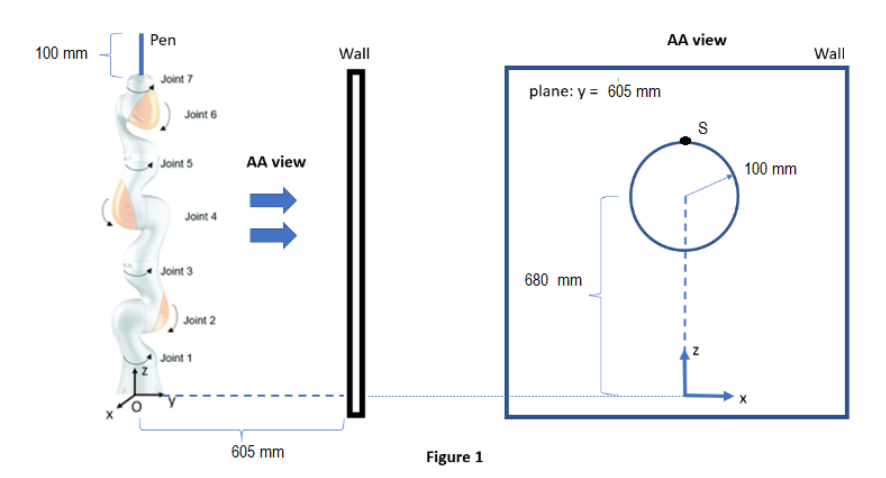

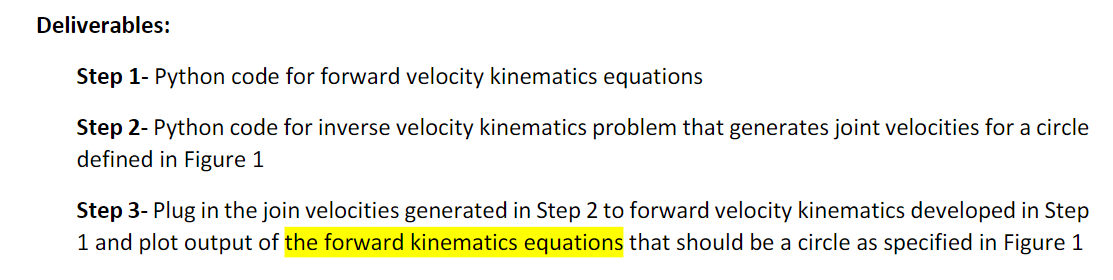

##**Libraries that have been used**


**SimPy Library** will allow us to develop and manipulate symbolic expressions.

In SymPy, we initialize printing so that all of the mathematical equations are rendered in standard mathematical notation.

In [ ]:
import sympy as sym
sym.init_printing()

from sympy import *

from sympy.physics.vector import Vector
Vector.simp = True

In [ ]:
import numpy as np
from numpy import *
import math

##**D-H Parameters**

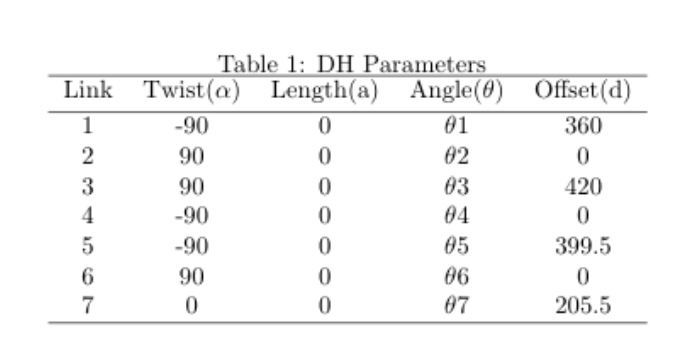

Initialization of Variables

In [ ]:
theta1, theta2, theta3, theta4, theta5, theta6, theta7 = sym.symbols("\\theta_1, theta_2, theta_3, theta_4, theta_5, theta_6, theta_7")
d1, d3, d5, d7 = sym.symbols("d_1,d_3,d_5,d_7")

d1 = 360
d3 = 420
d5 = 399.5
d7 = 205.5

##**STEP 1: Forward Kinematic equations (Transformation Matrices)**

**Calculating Transformation Matrices** from DH Parameters

In [ ]:
A1 = sym.Matrix([[sym.cos(theta1), 0, -sym.sin(theta1), 0], [sym.sin(theta1), 0, sym.cos(theta1), 0], [0, -1, 0, d1], [0, 0, 0, 1]])
A1

⎡cos(\theta₁)  0   -sin(\theta₁)   0 ⎤
⎢                                    ⎥
⎢sin(\theta₁)  0   cos(\theta₁)    0 ⎥
⎢                                    ⎥
⎢     0        -1        0        360⎥
⎢                                    ⎥
⎣     0        0         0         1 ⎦

In [ ]:
A2 = sym.Matrix([[sym.cos(theta2), 0, sym.sin(theta2), 0], [sym.sin(theta2), 0, -sym.cos(theta2), 0], [0, 1, 0, 0], [0, 0, 0, 1]])
A2

⎡cos(θ₂)  0  sin(θ₂)   0⎤
⎢                       ⎥
⎢sin(θ₂)  0  -cos(θ₂)  0⎥
⎢                       ⎥
⎢   0     1     0      0⎥
⎢                       ⎥
⎣   0     0     0      1⎦

In [ ]:
A3 = sym.Matrix([[sym.cos(0), 0, sym.sin(0), 0], [sym.sin(0), 0, -sym.cos(0), 0], [0, 1, 0, d3], [0, 0, 0, 1]])
A3

⎡1  0  0    0 ⎤
⎢             ⎥
⎢0  0  -1   0 ⎥
⎢             ⎥
⎢0  1  0   420⎥
⎢             ⎥
⎣0  0  0    1 ⎦

In [ ]:
A4 = sym.Matrix([[sym.cos(theta4), 0, -sym.sin(theta4), 0], [sym.sin(theta4), 0, sym.cos(theta4), 0], [0, -1, 0, 0], [0, 0, 0, 1]])
A4

⎡cos(θ₄)  0   -sin(θ₄)  0⎤
⎢                        ⎥
⎢sin(θ₄)  0   cos(θ₄)   0⎥
⎢                        ⎥
⎢   0     -1     0      0⎥
⎢                        ⎥
⎣   0     0      0      1⎦

In [ ]:
A5 = sym.Matrix([[sym.cos(theta5), 0, -sym.sin(theta5), 0], [sym.sin(theta5), 0, sym.cos(theta5), 0], [0, -1, 0, d5], [0, 0, 0, 1]])
A5

⎡cos(θ₅)  0   -sin(θ₅)    0  ⎤
⎢                            ⎥
⎢sin(θ₅)  0   cos(θ₅)     0  ⎥
⎢                            ⎥
⎢   0     -1     0      399.5⎥
⎢                            ⎥
⎣   0     0      0        1  ⎦

In [ ]:
A6 = sym.Matrix([[sym.cos(theta6), 0, sym.sin(theta6), 0], [sym.sin(theta6), 0, -sym.cos(theta6), 0], [0, 1, 0, 0], [0, 0, 0, 1]])
A6

⎡cos(θ₆)  0  sin(θ₆)   0⎤
⎢                       ⎥
⎢sin(θ₆)  0  -cos(θ₆)  0⎥
⎢                       ⎥
⎢   0     1     0      0⎥
⎢                       ⎥
⎣   0     0     0      1⎦

In [ ]:
A7 = sym.Matrix([[sym.cos(theta7), -sym.sin(theta7), 0, 0], [sym.sin(theta7), sym.cos(theta7), 0, 0], [0, 0, 1, d7], [0, 0, 0, 1]])
A7

⎡cos(θ₇)  -sin(θ₇)  0    0  ⎤
⎢                           ⎥
⎢sin(θ₇)  cos(θ₇)   0    0  ⎥
⎢                           ⎥
⎢   0        0      1  205.5⎥
⎢                           ⎥
⎣   0        0      0    1  ⎦

**Final Transformation Matrix**

In [ ]:
A = A1*A2*A3*A4*A5*A6*A7
A

⎡(((sin(θ₂)⋅sin(θ₄)⋅cos(\theta₁) + cos(\theta₁)⋅cos(θ₂)⋅cos(θ₄))⋅cos(θ₅) - sin
⎢                                                                             
⎢(((sin(\theta₁)⋅sin(θ₂)⋅sin(θ₄) + sin(\theta₁)⋅cos(θ₂)⋅cos(θ₄))⋅cos(θ₅) + sin
⎢                                                                             
⎢                                                               ((-sin(θ₂)⋅sin
⎢                                                                             
⎣                                                                             

(\theta₁)⋅sin(θ₅))⋅cos(θ₆) + (-sin(θ₂)⋅cos(\theta₁)⋅cos(θ₄) + sin(θ₄)⋅cos(\the
                                                                              
(θ₅)⋅cos(\theta₁))⋅cos(θ₆) + (-sin(\theta₁)⋅sin(θ₂)⋅cos(θ₄) + sin(\theta₁)⋅sin
                                                                              
(θ₄) - cos(θ₂)⋅cos(θ₄))⋅sin(θ₆) + (-sin(θ₂)⋅cos(θ₄) + sin(θ₄)⋅cos(θ₂))⋅cos(θ₅)
                                                   

##**Jacobian Matrix**

***Calculting Z***

In [ ]:
Z0 = sym.Matrix([0,0,1])
Z0

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣1⎦

In [ ]:
Z1 = A1[:3,2]
Z1

⎡-sin(\theta₁)⎤
⎢             ⎥
⎢cos(\theta₁) ⎥
⎢             ⎥
⎣      0      ⎦

In [ ]:
A12 = A1*A2
Z2 = A12[:3,2]
Z2

⎡sin(θ₂)⋅cos(\theta₁)⎤
⎢                    ⎥
⎢sin(\theta₁)⋅sin(θ₂)⎥
⎢                    ⎥
⎣      cos(θ₂)       ⎦

In [ ]:
A24 = A12*A3*A4
Z4 = A24[:3,2]
Z4

⎡sin(θ₂)⋅cos(\theta₁)⋅cos(θ₄) - sin(θ₄)⋅cos(\theta₁)⋅cos(θ₂)⎤
⎢                                                           ⎥
⎢sin(\theta₁)⋅sin(θ₂)⋅cos(θ₄) - sin(\theta₁)⋅sin(θ₄)⋅cos(θ₂)⎥
⎢                                                           ⎥
⎣             sin(θ₂)⋅sin(θ₄) + cos(θ₂)⋅cos(θ₄)             ⎦

In [ ]:
A45 = A24*A5
Z5 = A45[:3,2]
Z5

⎡-(sin(θ₂)⋅sin(θ₄)⋅cos(\theta₁) + cos(\theta₁)⋅cos(θ₂)⋅cos(θ₄))⋅sin(θ₅) - sin(
⎢                                                                             
⎢-(sin(\theta₁)⋅sin(θ₂)⋅sin(θ₄) + sin(\theta₁)⋅cos(θ₂)⋅cos(θ₄))⋅sin(θ₅) + cos(
⎢                                                                             
⎣                        -(-sin(θ₂)⋅cos(θ₄) + sin(θ₄)⋅cos(θ₂))⋅sin(θ₅)        

\theta₁)⋅cos(θ₅)⎤
                ⎥
\theta₁)⋅cos(θ₅)⎥
                ⎥
                ⎦

In [ ]:
A56 = A45*A6
Z6 = A56[:3,2]
Z6

⎡((sin(θ₂)⋅sin(θ₄)⋅cos(\theta₁) + cos(\theta₁)⋅cos(θ₂)⋅cos(θ₄))⋅cos(θ₅) - sin(
⎢                                                                             
⎢((sin(\theta₁)⋅sin(θ₂)⋅sin(θ₄) + sin(\theta₁)⋅cos(θ₂)⋅cos(θ₄))⋅cos(θ₅) + sin(
⎢                                                                             
⎣                                     -(-sin(θ₂)⋅sin(θ₄) - cos(θ₂)⋅cos(θ₄))⋅co

\theta₁)⋅sin(θ₅))⋅sin(θ₆) - (-sin(θ₂)⋅cos(\theta₁)⋅cos(θ₄) + sin(θ₄)⋅cos(\thet
                                                                              
θ₅)⋅cos(\theta₁))⋅sin(θ₆) - (-sin(\theta₁)⋅sin(θ₂)⋅cos(θ₄) + sin(\theta₁)⋅sin(
                                                                              
s(θ₆) + (-sin(θ₂)⋅cos(θ₄) + sin(θ₄)⋅cos(θ₂))⋅sin(θ₆)⋅cos(θ₅)                  

a₁)⋅cos(θ₂))⋅cos(θ₆)⎤
                    ⎥
θ₄)⋅cos(θ₂))⋅cos(θ₆)⎥
                    ⎥
                    ⎦

In [ ]:
A67 = A56*A7
Z7 = A67[:3,2]
sym.simplify(Z7)

⎡(-sin(\theta₁)⋅sin(θ₅) + cos(\theta₁)⋅cos(θ₅)⋅cos(θ₂ - θ₄))⋅sin(θ₆) + sin(θ₂ 
⎢                                                                             
⎢(sin(\theta₁)⋅cos(θ₅)⋅cos(θ₂ - θ₄) + sin(θ₅)⋅cos(\theta₁))⋅sin(θ₆) + sin(\the
⎢                                                                             
⎣                         -sin(θ₆)⋅sin(θ₂ - θ₄)⋅cos(θ₅) + cos(θ₆)⋅cos(θ₂ - θ₄)

- θ₄)⋅cos(\theta₁)⋅cos(θ₆)⎤
                          ⎥
ta₁)⋅sin(θ₂ - θ₄)⋅cos(θ₆) ⎥
                          ⎥
                          ⎦

**Calculating O**

In [ ]:
O0 = sym.Matrix([0, 0, 0])
O0

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

In [ ]:
O1 = A1[:3,3]
O1

⎡ 0 ⎤
⎢   ⎥
⎢ 0 ⎥
⎢   ⎥
⎣360⎦

In [ ]:
O2 = A12[:3,3]
O2

⎡ 0 ⎤
⎢   ⎥
⎢ 0 ⎥
⎢   ⎥
⎣360⎦

In [ ]:
O4 = A24[:3,3]
O4

⎡420⋅sin(θ₂)⋅cos(\theta₁)⎤
⎢                        ⎥
⎢420⋅sin(\theta₁)⋅sin(θ₂)⎥
⎢                        ⎥
⎣   420⋅cos(θ₂) + 360    ⎦

In [ ]:
O5 = A45[:3,3]
O5

⎡399.5⋅sin(θ₂)⋅cos(\theta₁)⋅cos(θ₄) + 420⋅sin(θ₂)⋅cos(\theta₁) - 399.5⋅sin(θ₄)
⎢                                                                             
⎢399.5⋅sin(\theta₁)⋅sin(θ₂)⋅cos(θ₄) + 420⋅sin(\theta₁)⋅sin(θ₂) - 399.5⋅sin(\th
⎢                                                                             
⎣                399.5⋅sin(θ₂)⋅sin(θ₄) + 399.5⋅cos(θ₂)⋅cos(θ₄) + 420⋅cos(θ₂) +

⋅cos(\theta₁)⋅cos(θ₂)⎤
                     ⎥
eta₁)⋅sin(θ₄)⋅cos(θ₂)⎥
                     ⎥
 360                 ⎦

In [ ]:
O6 = A56[:3,3]
O6

⎡399.5⋅sin(θ₂)⋅cos(\theta₁)⋅cos(θ₄) + 420⋅sin(θ₂)⋅cos(\theta₁) - 399.5⋅sin(θ₄)
⎢                                                                             
⎢399.5⋅sin(\theta₁)⋅sin(θ₂)⋅cos(θ₄) + 420⋅sin(\theta₁)⋅sin(θ₂) - 399.5⋅sin(\th
⎢                                                                             
⎣                399.5⋅sin(θ₂)⋅sin(θ₄) + 399.5⋅cos(θ₂)⋅cos(θ₄) + 420⋅cos(θ₂) +

⋅cos(\theta₁)⋅cos(θ₂)⎤
                     ⎥
eta₁)⋅sin(θ₄)⋅cos(θ₂)⎥
                     ⎥
 360                 ⎦

In [ ]:
O7 = A67[:3,3]
O7

⎡205.5⋅((sin(θ₂)⋅sin(θ₄)⋅cos(\theta₁) + cos(\theta₁)⋅cos(θ₂)⋅cos(θ₄))⋅cos(θ₅) 
⎢                                                                             
⎢205.5⋅((sin(\theta₁)⋅sin(θ₂)⋅sin(θ₄) + sin(\theta₁)⋅cos(θ₂)⋅cos(θ₄))⋅cos(θ₅) 
⎢                                                                             
⎣                                                      -205.5⋅(-sin(θ₂)⋅sin(θ₄

- sin(\theta₁)⋅sin(θ₅))⋅sin(θ₆) - 205.5⋅(-sin(θ₂)⋅cos(\theta₁)⋅cos(θ₄) + sin(θ
                                                                              
+ sin(θ₅)⋅cos(\theta₁))⋅sin(θ₆) - 205.5⋅(-sin(\theta₁)⋅sin(θ₂)⋅cos(θ₄) + sin(\
                                                                              
) - cos(θ₂)⋅cos(θ₄))⋅cos(θ₆) + 205.5⋅(-sin(θ₂)⋅cos(θ₄) + sin(θ₄)⋅cos(θ₂))⋅sin(

₄)⋅cos(\theta₁)⋅cos(θ₂))⋅cos(θ₆) + 399.5⋅sin(θ₂)⋅cos(\theta₁)⋅cos(θ₄) + 420⋅si
                                                                              
theta₁)⋅sin(θ₄)⋅cos(θ₂))⋅cos(θ₆) + 399.5⋅sin(\thet

**Calculating Jacobian**

Below are the Translation Matrix Elements from the Final Transformation Matrix

In [ ]:
px = A[0,3]; py = A[1,3]; pz = A[2,3];

Using the **2nd Method (Differentiation Method)** to obtain Jacobian

In [ ]:
a11 = sym.diff(px, theta1)
a12 = sym.diff(px, theta2)
a13 = sym.diff(px, theta4)
a14 = sym.diff(px, theta5)
a15 = sym.diff(px, theta6)
a16 = sym.diff(px, theta7)

a21 = sym.diff(py, theta1)
a22 = sym.diff(py, theta2)
a23 = sym.diff(py, theta4)
a24 = sym.diff(py, theta5)
a25 = sym.diff(py, theta6)
a26 = sym.diff(py, theta7)

a31 = sym.diff(pz, theta1)
a32 = sym.diff(pz, theta2)
a33 = sym.diff(pz, theta4)
a34 = sym.diff(pz, theta5)
a35 = sym.diff(pz, theta6)
a36 = sym.diff(pz, theta7)

In [ ]:
J = sym.Matrix([[a11, a12, a13, a14, a15, a16], [a21, a22, a23, a24, a25, a26],[a31, a32, a33, a34, a35, a36],[Z1,Z2,Z4,Z5,Z6,Z7]]) # assemble into matix form
J_sim = sym.simplify(J) # use sympy simplification method to obtain simplified results
J

⎡(205.5⋅(-sin(\theta₁)⋅sin(θ₂)⋅sin(θ₄) - sin(\theta₁)⋅cos(θ₂)⋅cos(θ₄))⋅cos(θ₅)
⎢                                                                             
⎢ (205.5⋅(sin(θ₂)⋅sin(θ₄)⋅cos(\theta₁) + cos(\theta₁)⋅cos(θ₂)⋅cos(θ₄))⋅cos(θ₅)
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎣                                                                             

 - 205.5⋅sin(θ₅)⋅cos(\theta₁))⋅sin(θ₆) + (-205.5⋅sin(\theta₁)⋅sin(θ₂)⋅cos(θ₄) 
                                                   

You can use the 1st Method aswell to Find the Jacobian

In [ ]:
# J1 = sym.Matrix([[Z0.cross(O7-O0)],[Z0]])
# J2 = sym.Matrix([[Z1.cross(O7-O1)],[Z1]])
# J3 = sym.Matrix([[Z2.cross(O7-O2)],[Z2]])
# J4 = sym.Matrix([[Z4.cross(O7-O4)],[Z4]])
# J5 = sym.Matrix([[Z5.cross(O7-O5)],[Z5]])
# J6 = sym.Matrix([[Z6.cross(O7-O6)],[Z6]])

# J = sym.Matrix([[J1, J2, J3, J4, J5, J6]])
# J

##***Inverse Kinematics (STEP 2) and Plotting the Circle (STEP 3)***



In [ ]:
theta_joint = sym.Matrix([0,30,-45,0,75,0])*(pi/180)
N = 60
th = linspace(float(pi/2), float((5*pi)/2),num=N)


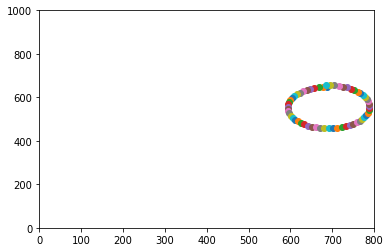

In [ ]:
import matplotlib.pyplot as plt

figure, ax = plt.subplots()
ax.set(xlim=(0, 800), ylim = (0,1000))

for i in range(0,N):
  x_dot = -100.0 * (2*pi/5)* sin(th[i])  
  z_dot = 100.0 * (2*pi/5)* cos(th[i])

  V = Matrix([x_dot,0.0, z_dot, 0.0, 0.0, 0.0])

  J_inv = J.evalf(3, subs={theta1:theta_joint[0],theta2:theta_joint[1],theta4:theta_joint[2],theta5:theta_joint[3],theta6:theta_joint[4],theta7:theta_joint[5]}).inv()
  
  theta_dot = J_inv*V

  theta_joint = theta_joint + (theta_dot*(5/N))

  T = A.evalf(3, subs={theta1:theta_joint[0],theta2:theta_joint[1],theta4:theta_joint[2],theta5:theta_joint[3],theta6:theta_joint[4],theta7:theta_joint[5]})

  plt.scatter(T[0,3],T[2,3])
  #plt.pause(5/N)

plt.show()
